Importerer biblioteker og definerer variabler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import streamlit as st
import pandas as pd
import pygfunction as gt

#konst_COP = 3 #Konstant COP-verdi for hver time gjennom (hvert) år(et).
antall_aar = 25

In [2]:
'''
aarlig = 295000 * 2/3 #kWh

mnd = ['jan','feb','mar','apr','mai','jun','jul','aug','sep','okt','nov','des']
dager_mnd = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
andel = [0.13, 0.12, 0.10, 0.10, 0.06, 0.03, 0.00, 0.03, 0.08, 0.10, 0.12, 0.13]
varighet = [24, 12, 10, 8, 8, 6, 6, 6, 8, 10, 12, 24]

bronnlast_johanne = []
for i in range(0,12):
    maaned = str(mnd[i])
    dag = np.hstack(varighet[i]*[andel[i]*aarlig/(varighet[i]*dager_mnd[i])])
    natt = np.zeros(24-varighet[i])
    hele_mnd = np.hstack(dager_mnd[i]*[dag,natt])
    bronnlast_johanne=np.concatenate([bronnlast_johanne,hele_mnd])
'''

"\naarlig = 295000 * 2/3 #kWh\n\nmnd = ['jan','feb','mar','apr','mai','jun','jul','aug','sep','okt','nov','des']\ndager_mnd = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]\nandel = [0.13, 0.12, 0.10, 0.10, 0.06, 0.03, 0.00, 0.03, 0.08, 0.10, 0.12, 0.13]\nvarighet = [24, 12, 10, 8, 8, 6, 6, 6, 8, 10, 12, 24]\n\nbronnlast_johanne = []\nfor i in range(0,12):\n    maaned = str(mnd[i])\n    dag = np.hstack(varighet[i]*[andel[i]*aarlig/(varighet[i]*dager_mnd[i])])\n    natt = np.zeros(24-varighet[i])\n    hele_mnd = np.hstack(dager_mnd[i]*[dag,natt])\n    bronnlast_johanne=np.concatenate([bronnlast_johanne,hele_mnd])\n"

In [3]:
with open('timer_i_Watt.txt') as f:
    bronnlast_validering = f.readlines()
bronnlast_validering = np.asarray(bronnlast_validering[-8760:], dtype=float)
bronnlast_validering = -bronnlast_validering/1000   # Gjør om fra W til kW

print(bronnlast_validering)
print(len(bronnlast_validering))

[313.0682589 310.6421567 300.9377478 ... 496.8127132 487.0732764
 516.2729659]
8760


2023-07-03 08:21:55.550 
  command:

    streamlit run C:\Users\asmund.fossum\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


[313068.2589 310642.1567 300937.7478 ... 496812.7132 487073.2764
 516272.9659]
66


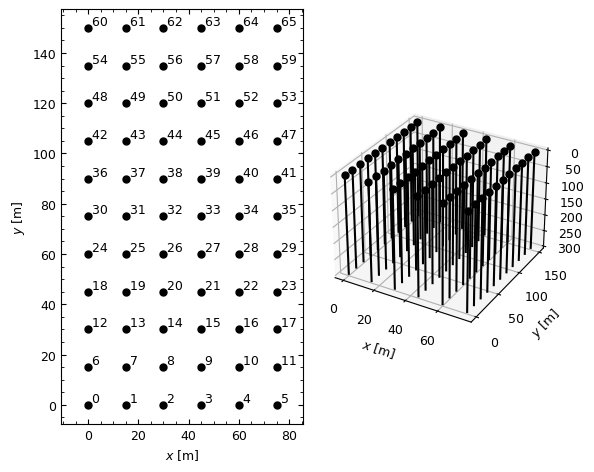

In [4]:

#COP = np.array([konst_COP]*8760*antall_aar)
import pygfunction_Magne_vali

# Beregning av brønntemperatur vha. Magnes pygfunction-kode:
pygf = pygfunction_Magne_vali.Simulation()                          
pygf.select_borehole_field(6)               #Hvis rektangulær: Antall brønner på langsiden (antall på kortsiden: N_2 i pygfunction).  Hvis fra fil: ingen betydning
pygf.YEARS = antall_aar
pygf.U_PIPE = "Single"  # Choose between "Single" and "Double"
pygf.R_B = 0.114/2  # Radius (m)                                       
pygf.R_OUT = 0.045/2  # Pipe outer radius (m)
pygf.R_IN = (0.045-2*0.0041)/2  # Pipe inner radius (m)
pygf.D_S = 0.062/2  # Shank spacing (m)                                
pygf.EPSILON = 1.0e-6  # Pipe roughness (m)
pygf.ALPHA = 3.9/2.16e6  # Ground thermal diffusivity (m2/s)
pygf.K_S = 3.9  # Ground thermal conductivity (W/m.K)            
pygf.T_G = 6.201282  # Undisturbed ground temperature (degrees)   
pygf.K_G = 0.6  # Grout thermal conductivity (W/m.K)
pygf.K_P = 0.42  # Pipe thermal conductivity (W/m.K)                   
pygf.H = 283  # Borehole depth (m)
pygf.B = 15.75  # Distance between boreholes (m)
pygf.D = 10  # Borehole buried depth
pygf.FLOW_RATE = 0.65*0.9705  # Flow rate (kg/s)
pygf.FLUID_NAME = "MPG"   
pygf.FLUID_DEGREES = 5  # at 20 degC
pygf.BOUNDARY_CONDITION = 'UHTR' # 'UHTR' , 'UBWT' eller 'MIFT'
pygf.run_simulation(np.array(bronnlast_validering)) #Grunnlast i enhet kW



bronntemp = pygf.tf_out
returtemp = pygf.tf_in
snittemp = (bronntemp+returtemp)/2
print(pygf.load_arr)
print(pygf.N_B)

#bronntemp = pd.DataFrame({'Brønntemperatur (degC)':bronntemp})
#returtemp = pd.DataFrame({'Returtemperatur (degC)':returtemp})
#til_excel = pd.concat([bronntemp,returtemp],axis=1)
#til_excel.to_excel('Brønntemperatur.xlsx')

#bronnlast_johanne = pd.DataFrame({'Brønnlast (kWh/h)':bronnlast_validering})
#bronnlast_johanne.to_excel('Brønnlast_Johanne.xlsx')

#gt.boreholes.visualize_field()

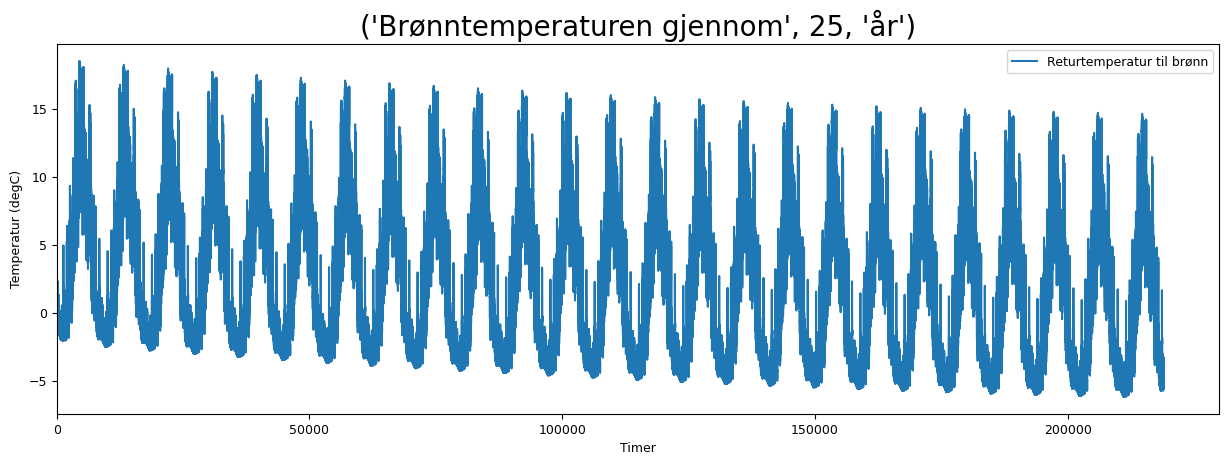


Pipe thermal resistance 0.07622939895878032
Fluid to inner pipe wall thermal resistance 0.010062771097845973
effective_borehole_thermal_resistance 0.142949535478482

Maks. temp. siste år: 14.628218584450131
Min. temp. siste år: -6.172800030677535


In [6]:
plt.figure().set_figwidth(15)
#plt.plot(returtemp)
#plt.plot(bronntemp)
plt.plot(snittemp)
plt.title(('Brønntemperaturen gjennom', antall_aar, 'år'), fontsize = 20)
plt.xlabel('Timer')
plt.xlim([0,230000])
plt.ylabel("Temperatur (degC)")
plt.legend(['Returtemperatur til brønn','Brønntemperatur'])
plt.show()

print('')
print('Pipe thermal resistance',pygf.R_P)
print('Fluid to inner pipe wall thermal resistance',pygf.R_F)
print('effective_borehole_thermal_resistance',pygf.R_B)
print('')
print('Maks. temp. siste år:',np.max(snittemp[-8760:]))
print('Min. temp. siste år:',np.min(snittemp[-8760:]))

#print('Maks. brønntemp. siste år:',np.max(bronntemp[-8760:]))
#print('Min. brønntemp. siste år:',np.min(bronntemp[-8760:]))
#print('Maks. returtemp. siste år:',np.max(returtemp[-8760:]))
#print('Min. returtemp. siste år:',np.min(returtemp[-8760:]))